In [431]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle

In [432]:
M_sun = 1.98992e+33 # gram
UnitMass_in_g = 1.0 * M_sun       # !!!!!!!!!!!!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!

grav_const_in_cgs = G = 6.6738e-8
rgas = 9.2e16                                     # The initial radius of the cloud in cm
rho0 = 6.02e-19                                   # The initial average density
tff = np.sqrt(3*np.pi/(32*G*rho0))                # The free-fall time = 3.4e4 yr
unitLength_in_cm = rgas
unitTime_in_s = (unitLength_in_cm**3/grav_const_in_cgs/UnitMass_in_g)**0.5
#unitTime_in_s = tff                               # Scaling time to free-fall time
unitLength_in_cm = rgas                           # Scaling distance to the initial cloud radius

UnitDensity_in_cgs = UnitMass_in_g / unitLength_in_cm**3

print(f'UnitDensity_in_cgs = {UnitDensity_in_cgs} g/cm^3')


unitVelocity_in_cm_per_s = unitLength_in_cm / unitTime_in_s          # The internal velocity unit
print(f'unitVelocity_in_cm_per_s = {round(unitVelocity_in_cm_per_s, 2)} cm/s')

UnitDensity_in_cgs = 2.555477932111449e-18 g/cm^3
unitVelocity_in_cm_per_s = 37993.6 cm/s


In [433]:
j = 1655

#filz = np.sort(glob.glob('./Outputs/*.pkl'))
filz = np.sort(glob.glob('/mnt/Linux_Shared_Folder_2022/Outputs_103k/*.pkl'))

In [434]:
with open(filz[j], 'rb') as f:
    data = pickle.load(f)

r = data['pos']
h = data['h']
v = data['v']
print(r.shape)

print('h = ', np.sort(h))

x = r[:, 0]
y = r[:, 1]
z = r[:, 2]
t = data['current_t']
rho = data['rho']
#unitTime_in_kyr = data['unitTime'] / 3600. / 24. / 365.25 / 1.e3

print('rho = ', np.sort(rho)*UnitDensity_in_cgs)

(103964, 3)
h =  [3.14121178e-04 3.14146623e-04 3.14153453e-04 ... 7.80396161e-01
 7.83855071e-01 7.85796891e-01]
rho =  [3.18805883e-23 3.26877099e-23 3.28243757e-23 ... 1.32654984e-12
 1.33219373e-12 1.34440614e-12]


## Selecting particles in a thin shell parallel to the x-y plane

In [481]:
delta = 0.1

nz = np.where((z >= -delta) & (z <= delta))[0]
print(len(nz))

rx = x[nz]
ry = y[nz]
rz = z[nz]

vt = v[nz]

35827


(-1.0, 1.0)

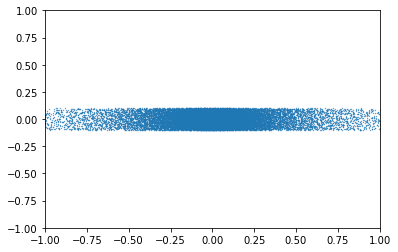

In [482]:
plt.scatter(rx, rz, s = 0.1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [483]:
radius = (rx*rx + ry*ry + rz*rz)**0.5

vr = (vt[:, 0]*rx + vt[:, 1]*ry + vt[:, 2]*rz)/radius

In [484]:
logR = np.log10(radius)
rgrid = np.logspace(min(logR), max(logR), 40)

In [485]:
res = []

for i in range(len(rgrid)-1):
    
    nx = np.where((radius > rgrid[i]) & (radius <= rgrid[i+1]))[0]
    
    res.append([rgrid[i], np.mean(vr[nx])])

res = np.array(res)

In [486]:
R = res[:, 0] * unitLength_in_cm
vr = res[:, 1] * unitVelocity_in_cm_per_s

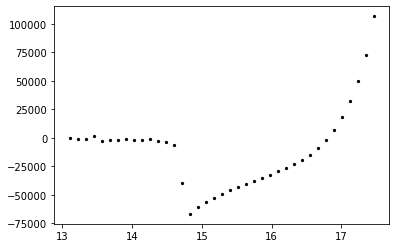

In [487]:
plt.scatter(np.log10(R), vr, s = 5, color = 'k');
#plt.axhline(y = 0.0, linestyle = '--', color = 'blue');

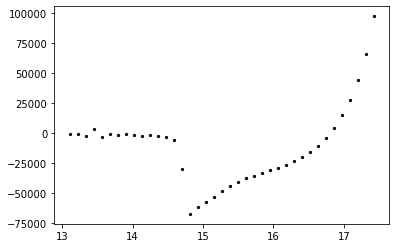

In [479]:
plt.scatter(np.log10(R), vr, s = 5, color = 'k');
#plt.axhline(y = 0.0, linestyle = '--', color = 'blue');

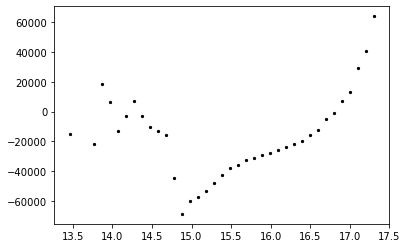

In [164]:
plt.scatter(np.log10(R), vr, s = 5, color = 'k');